In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results, get_experiment_details, average_scores_over_seeds

In [3]:
plt.rc('font', size=12)

In [4]:
######
# MOPO
######

# 0.1M Records
MP485 = get_results("MP485")
MP486 = get_results("MP486")
MP487 = get_results("MP487")

# 0.2M Records
MP488 = get_results("MP488")
MP489 = get_results("MP489")
MP490 = get_results("MP490")

# 0.5M Records
MP491 = get_results("MP491")
MP492 = get_results("MP492")
MP493 = get_results("MP493")

# 1M Records
MP494 = get_results("MP494")
MP495 = get_results("MP495")
MP496 = get_results("MP496")

# 2M Records
MP545 = get_results("MP545")
MP546 = get_results("MP546")
MP547 = get_results("MP547")

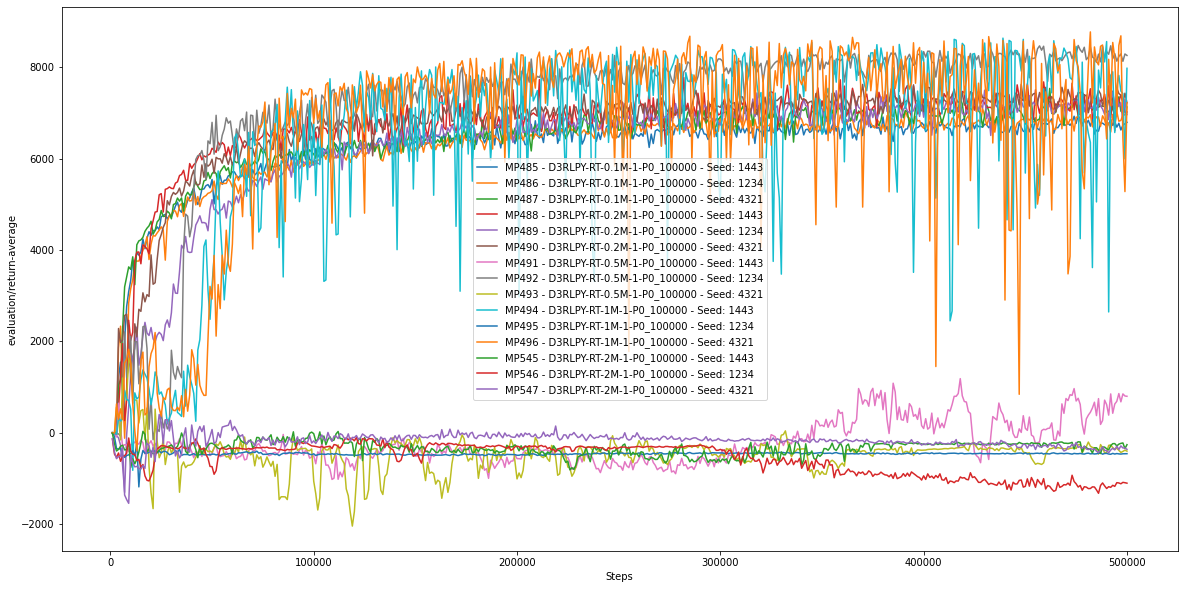

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    MP485,
    MP486,
    MP487,
    MP488,
    MP489,
    MP490,
    MP491,
    MP492,
    MP493,
    MP494,
    MP495,
    MP496,
    MP545,
    MP546,
    MP547
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

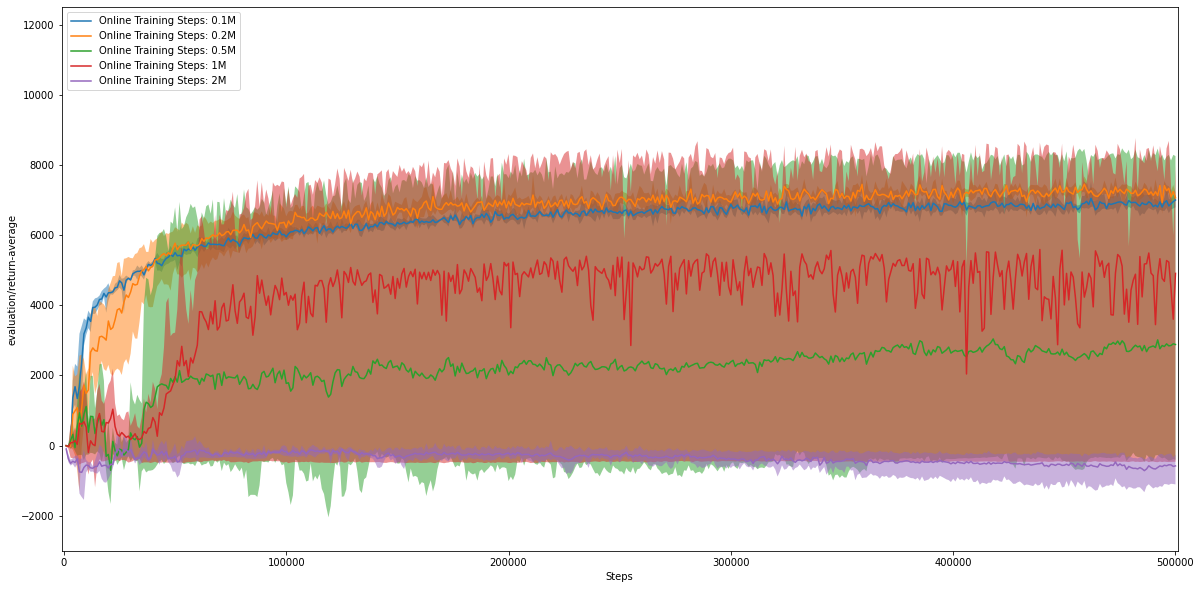

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp_set, steps in [
    ((MP485, MP486, MP487), '0.1'),
    ((MP488, MP489, MP490), '0.2'),
    ((MP491, MP492, MP493), '0.5'),
    ((MP494, MP495, MP496), '1'),
    ((MP545, MP546, MP547), '2'),
]:
    stacked_data = np.vstack([i.sac.result[feature] for i in exp_set])
    mean_vals = stacked_data.mean(axis=0)
    min_vals = stacked_data.min(axis=0)
    max_vals = stacked_data.max(axis=0)
    ax.plot(exp.sac.result['timesteps_total'], mean_vals, label=f'Online Training Steps: {steps}M')
    ax.fill_between(exp.sac.result['timesteps_total'], min_vals, max_vals, alpha=0.5)
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.set_xlim(-1000,501000)
ax.set_ylim(-3000,12500)
ax.legend(loc='upper left')
pass